Transfer learning is a machine learning technique where a model developed for a particular task is reused as the starting point for a model on a second task. This approach leverages pre-trained models, enabling quicker development and improved performance, especially in scenarios where data for the target task is limited. Here's a detailed look into transfer learning:

### Key Concepts

1. **Pre-trained Models**:
   - **Source Task**: The task for which the model was originally trained.
   - **Target Task**: The new task for which the pre-trained model will be adapted.

2. **Fine-Tuning**:
   - This involves taking a pre-trained model and making slight adjustments (fine-tuning) to adapt it to the new, often related, task.

3. **Feature Extraction**:
   - The pre-trained model is used to extract features from the data of the new task. These features are then fed into another model (often a simpler one) that is trained on the target task.

### How Transfer Learning Works

1. **Pre-training Phase**:
   - A model is trained on a large dataset for a source task. For instance, a neural network might be trained on ImageNet, a large visual database designed for use in visual object recognition research.

2. **Transfer Phase**:
   - The learned knowledge from the pre-trained model (like weights and biases in a neural network) is transferred to the target task. This can be done in two primary ways:
     - **Fine-Tuning**: The pre-trained model is fine-tuned on the target task's dataset by continuing the training process, usually with a lower learning rate.
     - **Feature Extraction**: The pre-trained model's internal layers are used as feature extractors, and only the final classification layer is trained on the target dataset.

### Applications of Transfer Learning

1. **Computer Vision**:
   - Pre-trained models like VGG, ResNet, and Inception are often fine-tuned for specific image recognition tasks.

2. **Natural Language Processing (NLP)**:
   - Models like BERT, GPT, and ELMo are pre-trained on large text corpora and fine-tuned for specific tasks such as sentiment analysis, translation, and text summarization.

3. **Speech Recognition**:
   - Transfer learning is used to adapt pre-trained models to recognize different languages or accents.

### Benefits of Transfer Learning

1. **Reduced Training Time**:
   - Since the model has already learned from a large dataset, training on the target task requires less time and computational resources.

2. **Improved Performance**:
   - Leveraging the knowledge from a pre-trained model often leads to better performance on the target task, especially when the dataset for the target task is small.

3. **Efficient Use of Data**:
   - Transfer learning is particularly useful in scenarios where collecting a large dataset for the target task is difficult.

### Challenges in Transfer Learning

1. **Negative Transfer**:
   - If the source and target tasks are too dissimilar, transfer learning can hurt performance rather than help.

2. **Model Compatibility**:
   - Ensuring that the architecture of the pre-trained model is suitable for the target task can be challenging.

3. **Hyperparameter Tuning**:
   - Fine-tuning the model requires careful adjustment of hyperparameters to avoid overfitting or underfitting.

### Example Workflow

1. **Select a Pre-trained Model**:
   - Choose a model trained on a large, diverse dataset related to your task. For example, using a model trained on ImageNet for a medical imaging task.

2. **Adapt the Model**:
   - Modify the architecture if necessary, typically by replacing the final layer(s) to match the target task's output requirements.

3. **Train on Target Task**:
   - Fine-tune the model using the target dataset, which involves adjusting weights and biases of the final layers and sometimes the entire network, albeit with a lower learning rate.

4. **Evaluate and Iterate**:
   - Assess the performance on a validation set, adjust hyperparameters, and iterate as needed.

Transfer learning has revolutionized the field of machine learning by enabling the reuse of existing models, reducing training times, and improving model performance across various domains.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths for the training and validation datasets
train_dir = r'C:\Users\suman\Downloads\DS\DL\PetImages\train'
validation_dir = r'C:\Users\suman\Downloads\DS\DL\PetImages\test'

# Image Data Generator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create iterators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 299 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [9]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with pre-trained weights, exclude top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [10]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras import layers, models

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the output from the VGG16 base model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
9/9 [==============================] - 94s 10s/step - loss: 0.7050 - accuracy: 0.5581 - val_loss: 0.5367 - val_accuracy: 0.7812
Epoch 2/10
9/9 [==============================] - 93s 10s/step - loss: 0.6892 - accuracy: 0.5880 - val_loss: 0.4642 - val_accuracy: 0.7812
Epoch 3/10


In [13]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

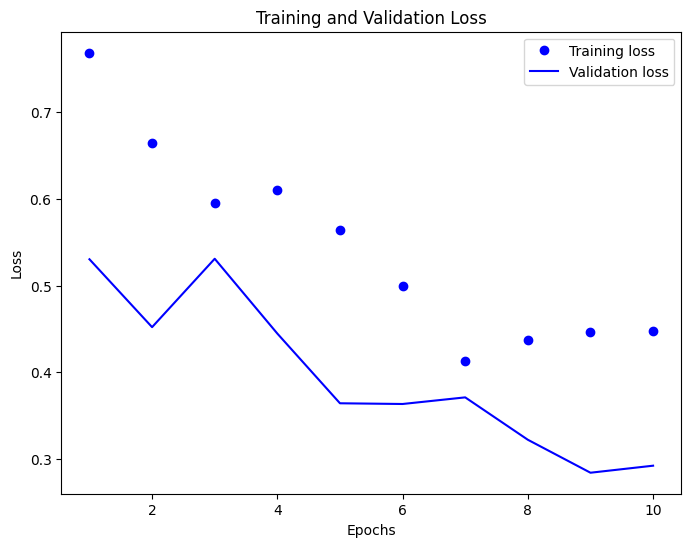

In [7]:
import matplotlib.pyplot as plt

# Retrieve loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
